# ***Reparameterization of common distributions***





We will work with Torch throughout this notebook.

In [1]:
import torch
from torch.distributions import Beta, Exponential, Categorical #, ...  import the distributions you need here
from torch.nn import functional as F

A helper function to visualize the generated samples:

In [2]:
import matplotlib.pyplot as plt
def compare_samples (samples_1, samples_2, bins=100, range=None):
  fig = plt.figure()
  if range is not None:
    plt.hist(samples_1, bins=bins, range=range)
    plt.hist(samples_2, bins=bins, range=range)
  else:
    plt.hist(samples_1, bins=bins)
    plt.hist(samples_2, bins=bins)
  plt.xlabel('value')
  plt.ylabel('number of samples')
  plt.legend(['direct','via reparameterization'])
  plt.show()

### ***Q1. Exponential Distribution***
Below write a function that generates N samples from $Exp (\lambda)$.

In [3]:
def exp_sampler(l, N):
  # insert your code
    rates = torch.full((N,), float(l) ) 
    samples = Exponential(rates).sample()
    return samples # should be N-by-1

Now, implement the reparameterization trick:

In [4]:
def exp_reparametrize(l,N):
  # this function should return N samples via reparametrization,
  # insert your code
    e = torch.rand(N)
    samples = -torch.log(1-e)/l
    return samples

Generate samples for $\lambda = 1$ and compare:

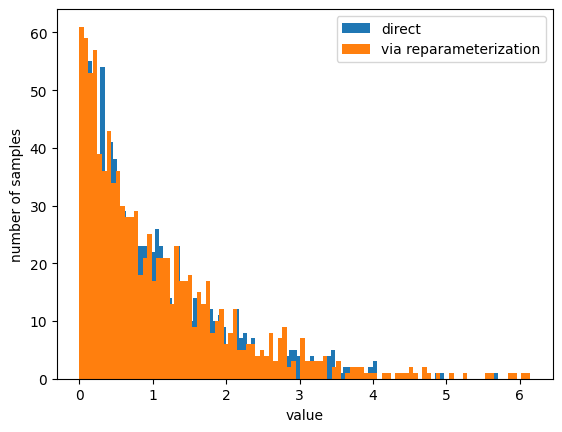

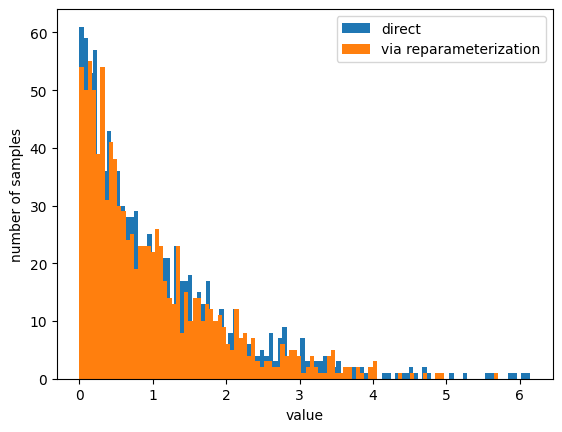

In [5]:
l = 1    #lambda
N = 1000
direct_samples = exp_sampler(l, N)
reparametrized_samples = exp_reparametrize(l, N)
compare_samples(direct_samples, reparametrized_samples)
compare_samples(reparametrized_samples, direct_samples)

### ***Q2. Categorical Distribution***
Below write a function that generates N samples from Categorical (**a**), where **a** = $[a_0, a_1, a_2, a_3]$.

In [6]:
def categorical_sampler(a, N):
  # insert your code
    rates = a.repeat(N,1) 
    samples = Categorical(rates).sample()
    return samples  # should be N-by-1

Now write a function that generates samples from Categorical (**a**) via reparameterization:




In [7]:
# Hint: approximate the Categorical distribution with the Gumbel-Softmax distribution
def categorical_reparametrize(a, N, temp=0.1, eps=1e-20):  # temp and eps are hyperparameters for Gumbel-Softmax
  # insert your code
    e = torch.rand(N, a.size(0))
    g = - torch.log(-torch.log(e+eps)+eps)
    
    logits = (torch.log(a) + g) / temp
    softmax_output = torch.nn.functional.softmax(logits, dim=1)
    
    # Apply the reparameterization trick
    samples = torch.argmax(softmax_output, dim=1)

    return samples # make sure that your implementation allows the gradient to backpropagate


Generate samples when $a = [0.1,0.2,0.5,0.2]$ and visualize them:

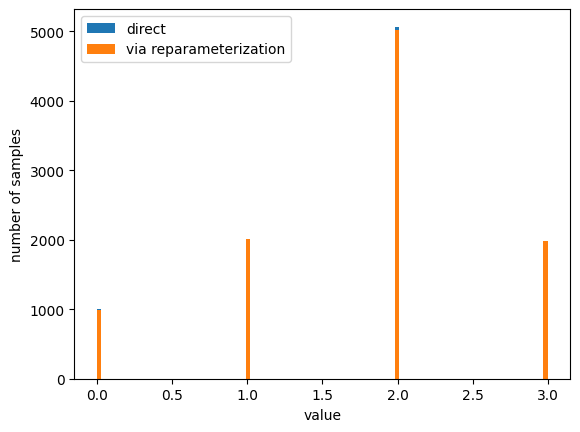

In [8]:
a = torch.tensor([0.1,0.2,0.5,0.2])
N = 1000
direct_samples = categorical_sampler(a, N)
reparametrized_samples = categorical_reparametrize(a, N, temp=0.1, eps=1e-20)
compare_samples(direct_samples, reparametrized_samples)
